# GECCO2019 - Bi-objective Traveling Thief Problem 

## Imports necessary for the evaluation

In [1]:
from non_dominated_sorting import fast_non_dominated_sort
import os.path
import numpy as np
import matplotlib.pyplot as plt
from hv import Hypervolume
from normalization import normalize
import pandas as pd

## Participants and Problems

In [14]:
# the result folder as a path
folder = os.path.join((os.path.dirname(os.getcwd())), "results")

# all submissions received
participants = [   
                    "nds-brkga_bi",
                    "PN-MBPS",
                    "PN-PHN",
                    "PN-DRLMOA",
                    "AM-DRLMOA",
                    "AM-MBPS",
                    "AM-PHN"
               ]

participant_names = [
    "NDS-BRKGA"
    "PN-MBPS",
    "PN-PHN",
    "PN-DRLMOA",
    "AM-DRLMOA",
    "AM-MBPS",
    "AM-PHN"
]

participant_name_dict = {
    "nds-brkga_bi":"NDS-BRKGA",
    "PN-MBPS":"PN-MBPS",
    "PN-PHN":"PN-PHN",
    "PN-DRLMOA":"PN-DRLMOA",
    "AM-DRLMOA":"AM-DRLMOA",
    "AM-MBPS":"AM-MBPS",
    "AM-PHN":"AM-PHN"
    
}
config_name_list = [
    "ch150_n1490_bounded-strongly-corr",
    "ch150_n1490_uncorr-similar-weights",
    "ch150_n1490_uncorr",
    "ch150_n149_bounded-strongly-corr",
    "ch150_n149_uncorr-similar-weights",
    "ch150_n149_uncorr",
    "ch150_n447_bounded-strongly-corr",
    "ch150_n447_uncorr-similar-weights",
    "ch150_n447_uncorr",
    "ch150_n745_bounded-strongly-corr",
    "ch150_n745_uncorr-similar-weights",
    "ch150_n745_uncorr",
    "eil76_n225_bounded-strongly-corr",
    "eil76_n225_uncorr-similar-weights",
    "eil76_n225_uncorr",
    "eil76_n375_bounded-strongly-corr",
    "eil76_n375_uncorr-similar-weights",
    "eil76_n375_uncorr",
    "eil76_n750_bounded-strongly-corr",
    "eil76_n750_uncorr-similar-weights",
    "eil76_n750_uncorr",
    "eil76_n75_bounded-strongly-corr",
    "eil76_n75_uncorr-similar-weights",
    "eil76_n75_uncorr",
]
num_instance_per_problem = 10
problems = []
for config_name in config_name_list:
    for i in range(1,num_instance_per_problem+1):
        idx = str(i)
        if i<10:
            idx = "0"+idx
        problems += [config_name+"_"+idx]

## Load data

Load all data from the submission directory and convert it to a minimization problem.
The data dictionary contains all submissions of a participant. The set of non-dominated points
is converted to a minimization problem by multiplying the profit times -1.

In [15]:
data = []
for problem in problems:
    for participant in participants:
        if participant == "nds-brkga_bi":
            data += [{"problem":problem, "participant":participant, "encode_time":0, "decode_time":0, "total_time":600}]
            continue
        # check for the corresponding file
        fname = "%s_%s.time" % (participant, problem)   
        path_to_file = os.path.join(folder,participant, fname)
        
        # in case the wrong delimiter was used
        if not os.path.isfile(path_to_file):
            fname = "%s_%s.time" % (participant, problem.replace("_", "-"))
            path_to_file = os.path.join(folder,participant, fname)
         
        _F = np.loadtxt(path_to_file)
        encode_time, decode_time, total_time = 0,0,0
        if _F.ndim == 0:
            total_time = _F
        else:
            encode_time, decode_time = _F[0], _F[1]
            total_time = encode_time + decode_time
        data += [{"problem":problem, "participant":participant, "encode_time":encode_time, "decode_time":decode_time, "total_time":total_time}]
df = pd.DataFrame(data, columns=["problem","participant","encode_time", "decode_time", "total_time" ])        

In [10]:
print(df)

                                   problem   participant  encode_time  \
0     ch150_n1490_bounded-strongly-corr_01  nds-brkga_bi     0.000000   
1     ch150_n1490_bounded-strongly-corr_01       PN-MBPS     0.004596   
2     ch150_n1490_bounded-strongly-corr_01        PN-PHN     0.009610   
3     ch150_n1490_bounded-strongly-corr_01     PN-DRLMOA     0.000000   
4     ch150_n1490_bounded-strongly-corr_01     AM-DRLMOA     0.000000   
...                                    ...           ...          ...   
1675                   eil76_n75_uncorr_10        PN-PHN     0.001484   
1676                   eil76_n75_uncorr_10     PN-DRLMOA     0.000000   
1677                   eil76_n75_uncorr_10     AM-DRLMOA     0.000000   
1678                   eil76_n75_uncorr_10       AM-MBPS     0.064488   
1679                   eil76_n75_uncorr_10        AM-PHN     0.014847   

      decode_time          total_time  
0        0.000000                 600  
1      388.042795          388.047391  
2  

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

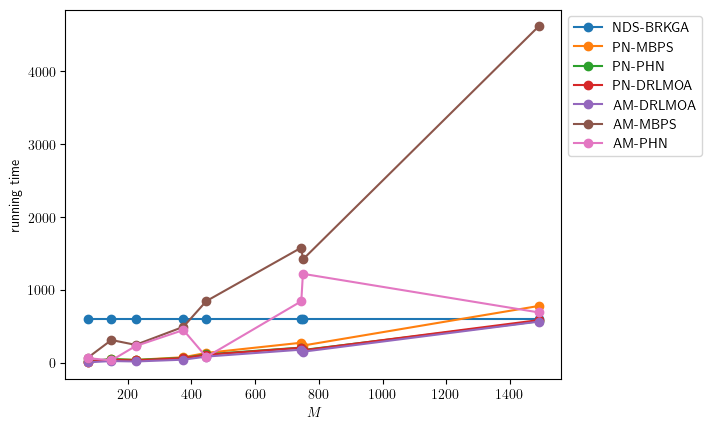

In [16]:
df_temp = df.copy()
# nlist = [75,225,375,750]
# nlist = [149, 447, 745, 1490]
nlist = [75,225,375,750,149, 447, 745, 1490]
nlist = sorted(nlist)
len_participant = 7
new_df = None
for n in nlist:
    n_str = "n"+str(n)+"_"
    ncol = [n for _ in range(len_participant)]
    df_n = df_temp[df_temp["problem"].str.contains(n_str)]
    df_average = df_n.groupby("participant")["total_time"].mean().reset_index(name="total_time")
    df_average["n"] = ncol
    if new_df is None:
        new_df = df_average
    else:
        new_df = pd.concat([new_df, df_average])
for participant in participants:
    ndf_p = new_df[new_df["participant"]==participant]
    participant_name = participant_name_dict[participant]
    plt.plot(ndf_p["n"], ndf_p["total_time"], marker="o", label=participant_name)
plt.xlabel(r'$M$')
plt.ylabel("running time")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("TimeNplots"+".jpg", dpi=200, bbox_inches='tight', )
plt.show()

Average over all knapsack capacity

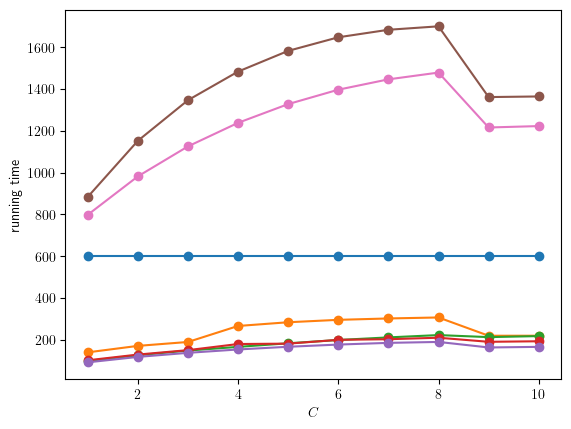

In [17]:
df_temp = df.copy()

clist = []
for i in range(1,11):
    c = str(i)
    if i<10:
        c = "0"+c
    c = "_"+c
    clist += [c]
m = "_n750_"
len_participant = 7
new_df = None
for i in range(10):
    c = clist[i]
    ccol = [i+1 for _ in range(len_participant)]
    df_c = df_temp[df_temp["problem"].str.contains(c)]
    df_c = df_c[df_c["problem"].str.contains(m)]
    df_average = df_c.groupby("participant")["total_time"].mean().reset_index(name="total_time")
    df_average["c"] = ccol
    if new_df is None:
        new_df = df_average
    else:
        new_df = pd.concat([new_df, df_average])

for participant in participants:
    ndf_p = new_df[new_df["participant"]==participant]
#     participant_name = participant_name_dict[participant]
    plt.plot(ndf_p["c"], ndf_p["total_time"], marker="o", label=participant)
plt.xlabel(r'$C$')
plt.ylabel("running time")
# plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("TIMECm750plots"+".jpg", dpi=200, bbox_inches='tight', )
plt.show()

In [18]:
df_temp = df.copy()
df_temp["decode_time"]/=200
#proposed_method_participants
pm_participants = [   
                    "mpn-r1nes",
                    "mpn-phn-eil",
                    "att-r1nes-eil",
                    "att-phn-eil"
               ]
arch_list = ["mpn", "att"]
for arch in arch_list:
    df_a = df_temp[df_temp["participant"].str.contains(arch)]
    avg_encode = df_a["encode_time"].mean()
    avg_decode = df_a["decode_time"].mean()
    print(arch, avg_encode, avg_decode, (avg_encode/avg_decode)*100)
#     df_average = df_c.groupby("participant")["encode_time"].mean().reset_index(name="total_time")
# for participant in pm_participants:
    

mpn nan nan nan
att nan nan nan


average over different correlation

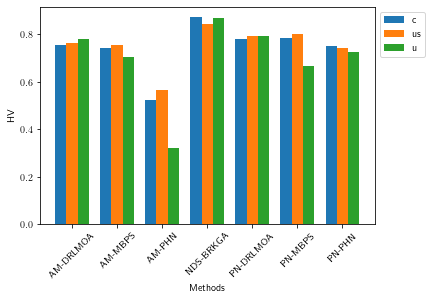

In [168]:
cor_list = ["bounded-strongly-corr_", "uncorr-similar-weights_", "_uncorr_"]
cor_labels = ["c", "us", "u"]
df_temp = df.copy()
len_participant = 7
new_df = None
for i in range(len(cor_list)):
    cor = cor_list[i]
    coridx_col = [i for _ in range(len_participant)]
    df_n = df_temp[df_temp["problem"].str.contains(cor)]
    df_average = df_n.groupby("participant")["hv"].mean().reset_index(name="hv")
    df_average["cor"] = coridx_col
    if new_df is None:
        new_df = df_average
    else:
        new_df = pd.concat([new_df, df_average])

width = 1
x = np.arange(len(participants))*4
for j, cor_label in enumerate(cor_labels):
    ndf_cor = new_df[new_df["cor"]==j]
    participant_labels_df = ndf_cor["participant"]
    plt.bar(x+j*width, ndf_cor["hv"], width=width,  label=cor_label)
    
plt.xlabel("Methods")
plt.ylabel("HV")
plt.xticks(x+1*width, participant_labels_df, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("CH150Corplots"+".jpg", dpi=200, bbox_inches='tight', )
plt.show()

In [10]:
print(df.to_csv("all_hv.csv"))

for problem in problems:

    print("=" * 60)
    print(problem)
    print("=" * 60)
    
    _df = df[df["problem"] == problem].copy()
    _df.sort_values("hv", ascending=False, inplace=True)
    _df.reset_index(drop=True, inplace=True)
    print(_df)

None
eil76_n225_bounded-strongly-corr_01
                               problem     participant        hv
0  eil76_n225_bounded-strongly-corr_01    nds-brkga_bi  0.911424
1  eil76_n225_bounded-strongly-corr_01  att-drlmoa-eil  0.858279
2  eil76_n225_bounded-strongly-corr_01         mpn-eil  0.853108
3  eil76_n225_bounded-strongly-corr_01       mpn-r1nes  0.835034
4  eil76_n225_bounded-strongly-corr_01     mpn-phn-eil  0.785291
5  eil76_n225_bounded-strongly-corr_01   att-r1nes-eil  0.725637
6  eil76_n225_bounded-strongly-corr_01     att-phn-eil  0.396595
eil76_n225_bounded-strongly-corr_02
                               problem     participant        hv
0  eil76_n225_bounded-strongly-corr_02    nds-brkga_bi  0.926666
1  eil76_n225_bounded-strongly-corr_02  att-drlmoa-eil  0.889059
2  eil76_n225_bounded-strongly-corr_02         mpn-eil  0.886091
3  eil76_n225_bounded-strongly-corr_02       mpn-r1nes  0.878582
4  eil76_n225_bounded-strongly-corr_02     mpn-phn-eil  0.839734
5  eil76_n225

6  eil76_n75_bounded-strongly-corr_09     att-phn-eil  0.402655
eil76_n75_bounded-strongly-corr_10
                              problem     participant        hv
0  eil76_n75_bounded-strongly-corr_10    nds-brkga_bi  0.808693
1  eil76_n75_bounded-strongly-corr_10         mpn-eil  0.651314
2  eil76_n75_bounded-strongly-corr_10       mpn-r1nes  0.625080
3  eil76_n75_bounded-strongly-corr_10     mpn-phn-eil  0.620794
4  eil76_n75_bounded-strongly-corr_10  att-drlmoa-eil  0.605985
5  eil76_n75_bounded-strongly-corr_10   att-r1nes-eil  0.575373
6  eil76_n75_bounded-strongly-corr_10     att-phn-eil  0.454779
eil76_n75_uncorr-similar-weights_01
                               problem     participant        hv
0  eil76_n75_uncorr-similar-weights_01    nds-brkga_bi  0.821362
1  eil76_n75_uncorr-similar-weights_01       mpn-r1nes  0.443758
2  eil76_n75_uncorr-similar-weights_01         mpn-eil  0.389170
3  eil76_n75_uncorr-similar-weights_01   att-r1nes-eil  0.381769
4  eil76_n75_uncorr-similar-

The data frame contains all results. Now, we need to rank the submission for each test instance:

In [11]:
# the final ranking. And add zero points initially (sum is later taken anyway...)
ranking = []
for participant in participants:
    ranking.append({'participant': participant, 'points' : 0})


# one more time loop through problem wise
for problem in problems:
    
    _df = df[df["problem"] == problem].copy()
    
    # sort descending by hv
    _df.sort_values("hv", ascending=False, inplace=True)
    
    # 3 points for the 1st place
    first = _df.iloc[0]["participant"]
    ranking.append({'participant': first, 'points' : 3})
    
    # 2 points for the 2nd place
    second = _df.iloc[1]["participant"]
    ranking.append({'participant': second, 'points' : 2})
    
    # 1 point for the 3rd place
    third = _df.iloc[2]["participant"]
    ranking.append({'participant': third, 'points' : 1})

    
ranking = pd.DataFrame(ranking, columns=["participant", "points"])

# Leaderboard

Finally, we sum up the hypervolume for each problem and evaluate the winner!

In [12]:
ranking.groupby('participant').sum().sort_values("points", ascending=False)

,points
participant,
mpn-eil,214
att-drlmoa-eil,190
nds-brkga_bi,161
mpn-r1nes,119
att-r1nes-eil,23
mpn-phn-eil,13
att-phn-eil,0


## Leaderboard as HTML

In [13]:


standalone = True
if standalone:
    print("<script src='https://code.jquery.com/jquery-3.2.1.slim.min.js' integrity='sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN' crossorigin='anonymous'></script>")
    print("<script src='https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js' integrity='sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q' crossorigin='anonymous'></script>")
    print("<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js' integrity='sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl' crossorigin='anonymous'></script>")

print("<div class='row'><div class='w-50'>")
print("<table class='table'>")
print("<tr><th>Problem</th><th>Team</th><th>Hypervolume</th><th>Estimated Ideal Point</th><th>Estimated Nadir Point</th></tr>")

for problem in problems:
    
    _df = df[df["problem"] == problem].copy()
    _df.sort_values("hv", ascending=False, inplace=True)
    _df.reset_index(drop=True)
    
    first = True
    for i, e in _df.iterrows():
        
        problem, team, hv = e.values
        
        if first:
            
            s_row_span = "<th rowspan='%s'>%s</th>"
            
            s_problem = s_row_span % (len(_df), problem)
            s_ideal = s_row_span % (len(_df), "(%s, %s)" % (round(ideal_point[problem][0]), round(ideal_point[problem][1])))
            s_nadir = s_row_span % (len(_df), "(%s, %s)" % (round(nadir_point[problem][0]), round(nadir_point[problem][1])))
            
            print("<tr>%s <th>%s</th> <th>%s</th> %s %s  </tr>" 
                  % (s_problem, team, round(hv,4), s_ideal, s_nadir))
        else:
            print("<tr><th>%s</th><th>%s</th></tr>" % (team, round(hv,4)))
        
            
        first = False
        
    print()
    
    
print("<table>")
print("</div></div>")

<script src='https://code.jquery.com/jquery-3.2.1.slim.min.js' integrity='sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN' crossorigin='anonymous'></script>
<script src='https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js' integrity='sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q' crossorigin='anonymous'></script>
<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js' integrity='sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl' crossorigin='anonymous'></script>
<div class='row'><div class='w-50'>
<table class='table'>
<tr><th>Problem</th><th>Team</th><th>Hypervolume</th><th>Estimated Ideal Point</th><th>Estimated Nadir Point</th></tr>
<tr><th rowspan='7'>eil76_n225_bounded-strongly-corr_01</th> <th>nds-brkga_bi</th> <th>0.9114</th> <th rowspan='7'>(585, -33269)</th> <th rowspan='7'>(1205, 0)</th>  </tr>
<tr><th>att-drlmoa-eil</th><th>0.8583</th></tr>
<tr><th>mpn-eil<

<tr><th rowspan='7'>eil76_n75_uncorr-similar-weights_10</th> <th>nds-brkga_bi</th> <th>0.9736</th> <th rowspan='7'>(585, -38254)</th> <th rowspan='7'>(5154, 0)</th>  </tr>
<tr><th>mpn-eil</th><th>0.9409</th></tr>
<tr><th>mpn-r1nes</th><th>0.933</th></tr>
<tr><th>att-drlmoa-eil</th><th>0.9317</th></tr>
<tr><th>att-r1nes-eil</th><th>0.9135</th></tr>
<tr><th>mpn-phn-eil</th><th>0.8942</th></tr>
<tr><th>att-phn-eil</th><th>0.866</th></tr>

<tr><th rowspan='7'>eil76_n75_uncorr_01</th> <th>nds-brkga_bi</th> <th>0.8288</th> <th rowspan='7'>(585, -12617)</th> <th rowspan='7'>(1132, 0)</th>  </tr>
<tr><th>mpn-eil</th><th>0.6018</th></tr>
<tr><th>mpn-r1nes</th><th>0.592</th></tr>
<tr><th>att-r1nes-eil</th><th>0.5787</th></tr>
<tr><th>att-drlmoa-eil</th><th>0.517</th></tr>
<tr><th>mpn-phn-eil</th><th>0.4901</th></tr>
<tr><th>att-phn-eil</th><th>0.3903</th></tr>

<tr><th rowspan='7'>eil76_n75_uncorr_02</th> <th>nds-brkga_bi</th> <th>0.8781</th> <th rowspan='7'>(585, -18448)</th> <th rowspan='7'>(1

In [14]:
_ranking = ranking.groupby('participant').sum().sort_values("points", ascending=False)

standalone = True
if standalone:
    print("<script src='https://code.jquery.com/jquery-3.2.1.slim.min.js' integrity='sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN' crossorigin='anonymous'></script>")
    print("<script src='https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js' integrity='sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q' crossorigin='anonymous'></script>")
    print("<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js' integrity='sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl' crossorigin='anonymous'></script>")


print("<div class='row'><div class='w-50'>")
print("<table class='table'>")
print("<tr><th>Rank</th><th>Team</th><th>Points</th></tr>")


counter = 0
for i, e in _ranking.iterrows():
    print("<tr><th>%s</th><th>%s</th><th>%s</th></tr>" % (counter+1, i, e[0]))
    counter += 1

    
print("<table>")
print("</div></div>")


<script src='https://code.jquery.com/jquery-3.2.1.slim.min.js' integrity='sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN' crossorigin='anonymous'></script>
<script src='https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js' integrity='sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q' crossorigin='anonymous'></script>
<script src='https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js' integrity='sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl' crossorigin='anonymous'></script>
<div class='row'><div class='w-50'>
<table class='table'>
<tr><th>Rank</th><th>Team</th><th>Points</th></tr>
<tr><th>1</th><th>mpn-eil</th><th>214</th></tr>
<tr><th>2</th><th>att-drlmoa-eil</th><th>190</th></tr>
<tr><th>3</th><th>nds-brkga_bi</th><th>161</th></tr>
<tr><th>4</th><th>mpn-r1nes</th><th>119</th></tr>
<tr><th>5</th><th>att-r1nes-eil</th><th>23</th></tr>
<tr><th>6</th><th>mpn-phn-eil</th><th>13</th>